In [ ]:
!pip install pandas numpy opencv-python scikit-image

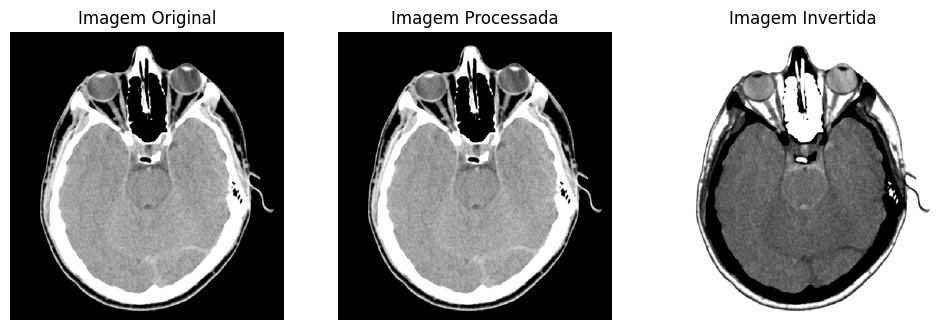

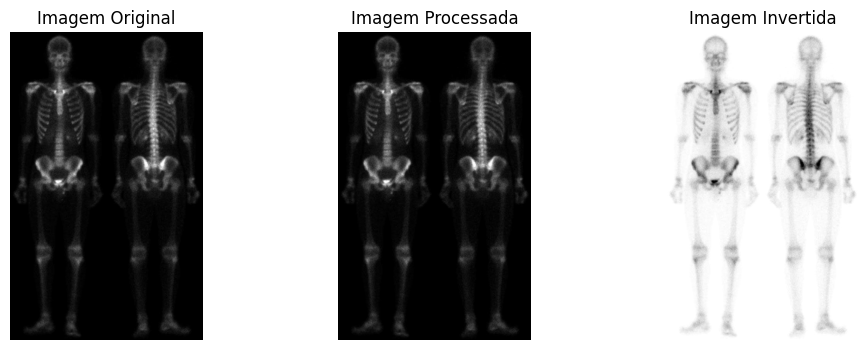

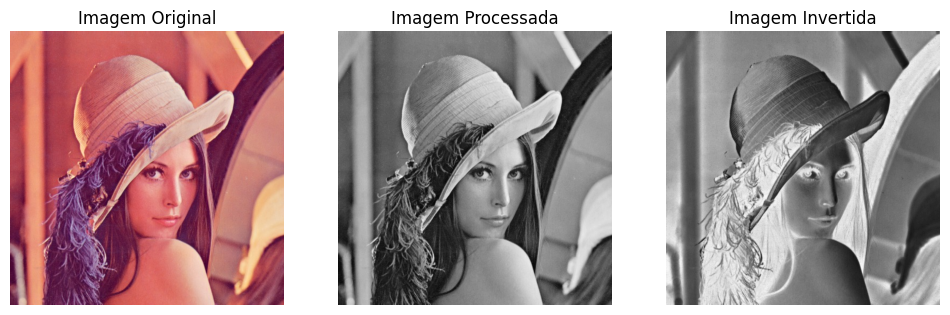

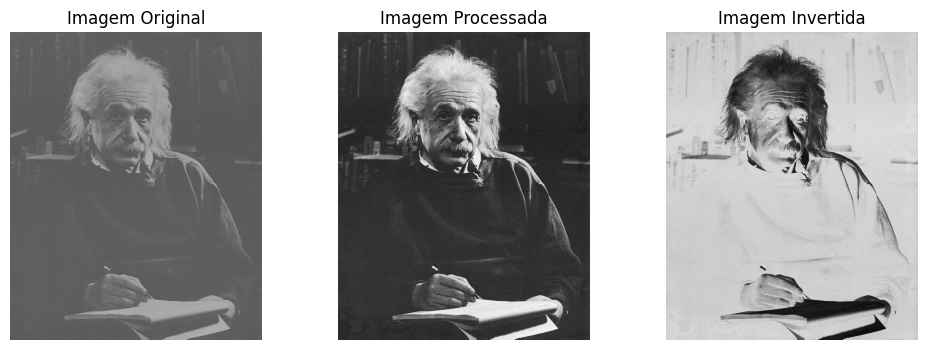

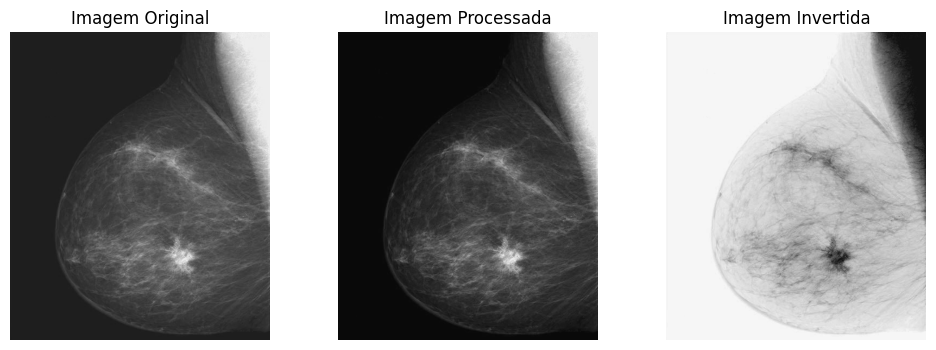

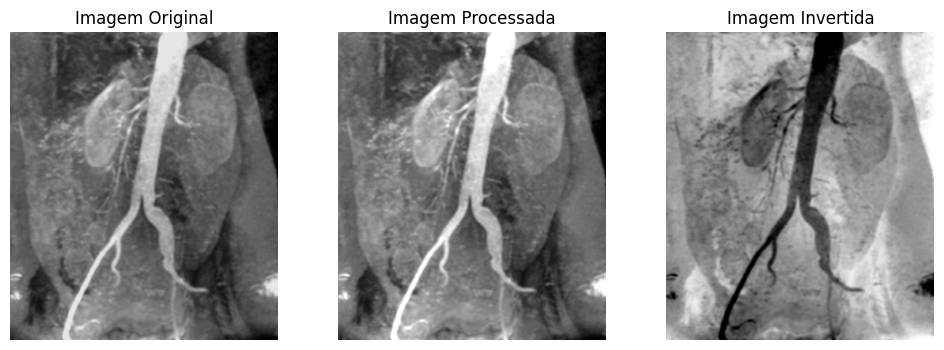

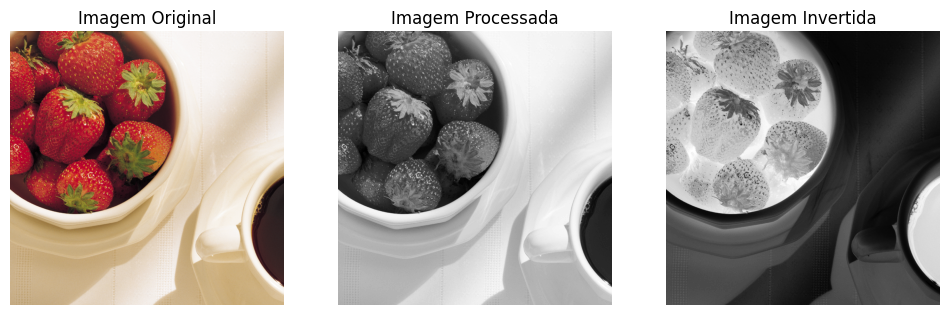

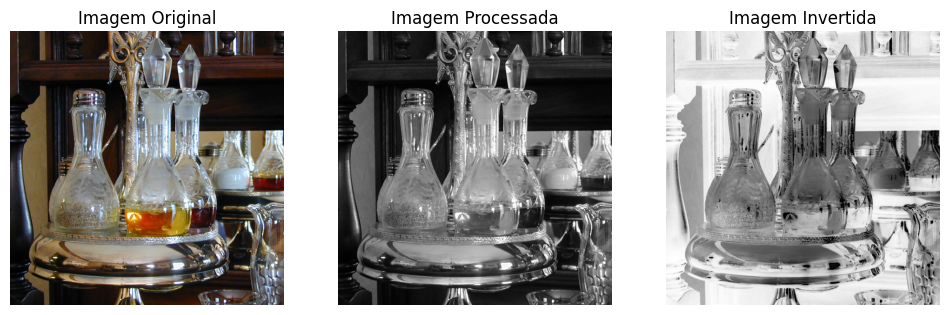

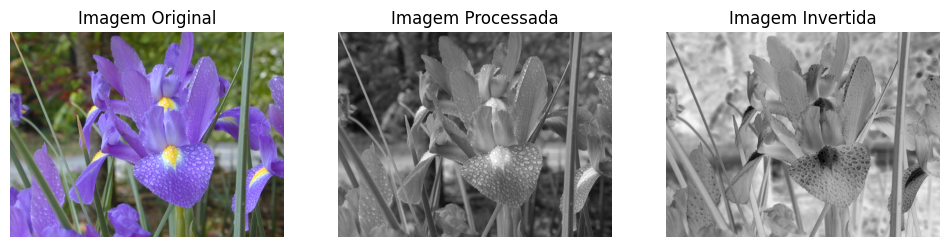

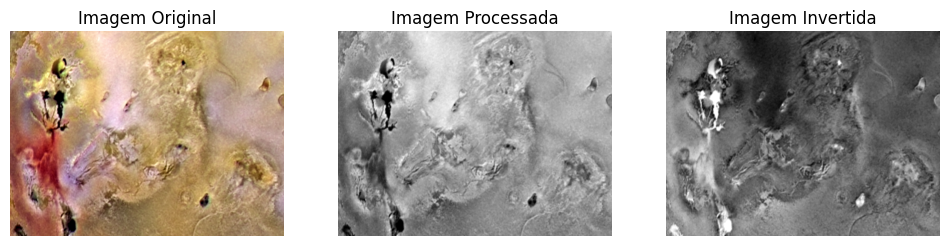

In [ ]:
import pandas as pd
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt

# Cria um DataFrame fictício com informações sobre as imagens
data = {'PacienteID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'CaminhoImagem': ['Crânio.tif', 'Esqueleto.tif', 'Lena.jpg', 'Einstein.tif', 'Mama.tif', 'Rins.jpg', 'Morango.tif', 'Vidros.tif', 'Flor.tif', 'Jupiter.tif']}
df = pd.DataFrame(data)

# Função para carregar e processar as imagens
def processar_imagem(caminho):
    # Carrega a imagem usando OpenCV
    imagem = cv2.imread(caminho)

    # Processamento da imagem - converte para escala de cinza
    imagem_processada = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Processa a imagem deixando com cores invertidas
    imagem_invertida = np.invert(imagem_processada)

    # Retorna um objeto pd.Series contendo as imagens processada e invertida,
    # para que possam ser facilmente atribuídas como colunas no DataFrame.
    # As imagens são armazenadas em uma lista, e os rótulos das colunas são especificados.
    return pd.Series([imagem_processada, imagem_invertida], index=['ImagemProcessada', 'ImagemInvertida'])

# Aplicar a função a cada linha do DataFrame e adicionar o resultado como novas colunas
df[['ImagemProcessada', 'ImagemInvertida']] = df['CaminhoImagem'].apply(processar_imagem)

# Visualizar as imagens originais, processadas e invertidas
for index, row in df.iterrows():
    imagem_original = io.imread(row['CaminhoImagem'])
    imagem_original_rgb = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)  # Converter para formato RGB
    imagem_original_rgb = imagem_original_rgb[:, :, ::-1]  # Converter para formato RGB
    imagem_processada = row['ImagemProcessada']
    imagem_invertida = row['ImagemInvertida']

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(imagem_original_rgb)
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(imagem_processada, cmap='gray')
    plt.title('Imagem Processada')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(imagem_invertida, cmap='gray')
    plt.title('Imagem Invertida')
    plt.axis('off')

    plt.show()
